# **Proyek Pertama** : Membuat Model Predictive Analytics
- Nama          : Mahendra Kirana M.B
- Email         : mahendrakirana284@gmail.com
- ID Dicoding   : MC208D5Y1158

# **Prediksi Harga Laptop Berdasarkan Spesifikasinya dengan Menggunakan Metode Regresi**

In [1]:
# ============================================================================
# CELL 1: IMPORT LIBRARIES DAN SETUP
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries berhasil diimport")

✅ Libraries berhasil diimport


In [2]:
# ============================================================================
# CELL 2: LOAD DAN EKSPLORASI DATA
# ============================================================================

# Load dataset
df = pd.read_csv('laptop_price_dataset.csv')

print("📊 INFORMASI DATASET")
print("="*50)
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"\nKolom-kolom dalam dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

# Tampilkan preview data
print("\n📋 PREVIEW DATA (5 baris pertama):")
df.head()

📊 INFORMASI DATASET
Jumlah baris: 893
Jumlah kolom: 18

Kolom-kolom dalam dataset:
 1. Unnamed: 0.1
 2. Unnamed: 0
 3. brand
 4. name
 5. price
 6. spec_rating
 7. processor
 8. CPU
 9. Ram
10. Ram_type
11. ROM
12. ROM_type
13. GPU
14. display_size
15. resolution_width
16. resolution_height
17. OS
18. warranty

📋 PREVIEW DATA (5 baris pertama):


,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [3]:
# ============================================================================
# CELL 3: DATA INFO DAN STATISTIK
# ============================================================================

# Info dataset
print("🔍 INFORMASI DETAIL DATASET:")
print("="*50)
df.info()

print("\n📈 STATISTIK DESKRIPTIF:")
print("="*50)
df.describe()

🔍 INFORMASI DETAIL DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16

,Unnamed: 0.1,Unnamed: 0,price,spec_rating,display_size,resolution_width,resolution_height,warranty
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,467.135498,521.382979,79907.409854,69.379026,15.173751,2035.393057,1218.324748,1.079507
std,270.209769,299.916605,60880.043823,5.541555,0.939095,426.076009,326.756883,0.326956
min,0.000000,0.000000,9999.000000,60.000000,11.600000,1080.000000,768.000000,0.000000
25%,235.000000,265.000000,44500.000000,66.000000,14.000000,1920.000000,1080.000000,1.000000
50%,467.000000,531.000000,61990.000000,69.323529,15.600000,1920.000000,1080.000000,1.000000
75%,702.000000,784.000000,90990.000000,71.000000,15.600000,1920.000000,1200.000000,1.000000
max,930.000000,1019.000000,450039.000000,89.000000,18.000000,3840.000000,3456.000000,3.000000


In [4]:
# ============================================================================
# CELL 4: DATA CLEANING
# ============================================================================

print("🧹 DATA CLEANING")
print("="*50)

# Drop kolom yang tidak diperlukan (jika ada)
columns_to_drop = []
if 'Unnamed: 0.1' in df.columns:
    columns_to_drop.append('Unnamed: 0.1')
if 'Unnamed: 0' in df.columns:
    columns_to_drop.append('Unnamed: 0')

if columns_to_drop:
    df_clean = df.drop(columns_to_drop, axis=1)
    print(f"Dropped columns: {columns_to_drop}")
else:
    df_clean = df.copy()
    print("No unnamed columns to drop")

# Cek missing values
print("\nMissing values per kolom:")
print(df_clean.isnull().sum())

# Cek duplikasi
print(f"\nJumlah data duplikat: {df_clean.duplicated().sum()}")

# Analisis target variable (price)
print(f"\nAnalisis Target Variable (price):")
print(f"Min price: ${df_clean['price'].min():,}")
print(f"Max price: ${df_clean['price'].max():,}")
print(f"Mean price: ${df_clean['price'].mean():.2f}")
print(f"Median price: ${df_clean['price'].median():.2f}")

🧹 DATA CLEANING
Dropped columns: ['Unnamed: 0.1', 'Unnamed: 0']

Missing values per kolom:
brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

Jumlah data duplikat: 0

Analisis Target Variable (price):
Min price: $9,999
Max price: $450,039
Mean price: $79907.41
Median price: $61990.00


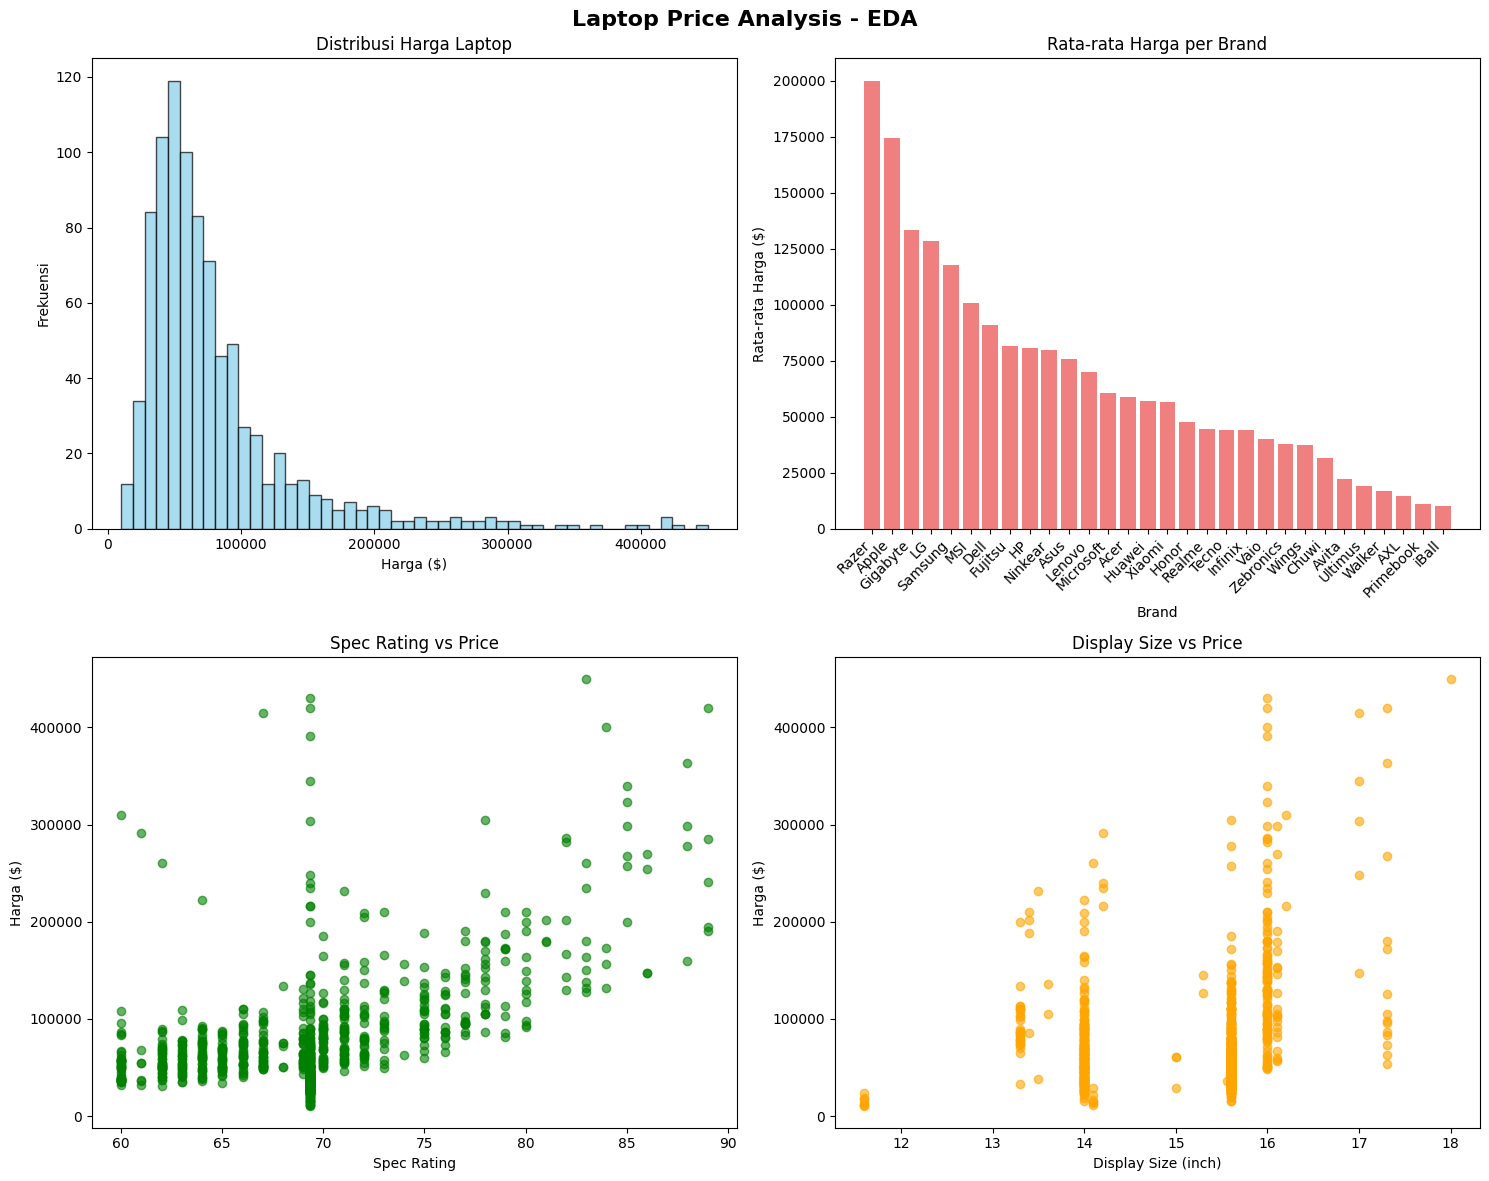

In [5]:
# ============================================================================
# CELL 5: EXPLORATORY DATA ANALYSIS - VISUALISASI
# ============================================================================

# Set up plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Laptop Price Analysis - EDA', fontsize=16, fontweight='bold')

# 1. Distribusi harga
axes[0,0].hist(df_clean['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribusi Harga Laptop')
axes[0,0].set_xlabel('Harga ($)')
axes[0,0].set_ylabel('Frekuensi')

# 2. Harga berdasarkan brand
brand_price = df_clean.groupby('brand')['price'].mean().sort_values(ascending=False)
axes[0,1].bar(range(len(brand_price)), brand_price.values, color='lightcoral')
axes[0,1].set_title('Rata-rata Harga per Brand')
axes[0,1].set_xlabel('Brand')
axes[0,1].set_ylabel('Rata-rata Harga ($)')
axes[0,1].set_xticks(range(len(brand_price)))
axes[0,1].set_xticklabels(brand_price.index, rotation=45, ha='right')

# 3. Korelasi spec_rating vs price
axes[1,0].scatter(df_clean['spec_rating'], df_clean['price'], alpha=0.6, color='green')
axes[1,0].set_title('Spec Rating vs Price')
axes[1,0].set_xlabel('Spec Rating')
axes[1,0].set_ylabel('Harga ($)')

# 4. Display size vs price
axes[1,1].scatter(df_clean['display_size'], df_clean['price'], alpha=0.6, color='orange')
axes[1,1].set_title('Display Size vs Price')
axes[1,1].set_xlabel('Display Size (inch)')
axes[1,1].set_ylabel('Harga ($)')

plt.tight_layout()
plt.show()

In [6]:
# ============================================================================
# CELL 6: ANALISIS KATEGORIKAL
# ============================================================================

print("📋 ANALISIS VARIABEL KATEGORIKAL:")
print("="*50)

categorical_cols = ['brand', 'processor', 'Ram_type', 'ROM_type', 'GPU', 'OS']
for col in categorical_cols:
    if col in df_clean.columns:
        print(f"\n{col.upper()}:")
        print(f"Jumlah kategori unik: {df_clean[col].nunique()}")
        print("Top 5 kategori:")
        print(df_clean[col].value_counts().head())

📋 ANALISIS VARIABEL KATEGORIKAL:

BRAND:
Jumlah kategori unik: 30
Top 5 kategori:
brand
HP        186
Lenovo    169
Asus      157
Dell      107
Acer       84
Name: count, dtype: int64

PROCESSOR:
Jumlah kategori unik: 184
Top 5 kategori:
processor
12th Gen Intel Core i5 1235U     49
13th Gen Intel Core i5 1335U     41
12th Gen Intel Core i3 1215U     38
11th Gen Intel Core i3 1115G4    36
12th Gen Intel Core i5 12450H    33
Name: count, dtype: int64

RAM_TYPE:
Jumlah kategori unik: 12
Top 5 kategori:
Ram_type
DDR4       499
DDR5       166
LPDDR5     145
LPDDR4X     41
LPDDR4      14
Name: count, dtype: int64

ROM_TYPE:
Jumlah kategori unik: 2
Top 5 kategori:
ROM_type
SSD          872
Hard-Disk     21
Name: count, dtype: int64

GPU:
Jumlah kategori unik: 134
Top 5 kategori:
GPU
Intel Iris Xe Graphics    107
Intel UHD Graphics         63
Intel Integrated UHD       61
AMD Radeon AMD             55
AMD Radeon Graphics        54
Name: count, dtype: int64

OS:
Jumlah kategori unik: 14
Top 5 

In [7]:
# ============================================================================
# CELL 7: FEATURE ENGINEERING
# ============================================================================

print("🔧 FEATURE ENGINEERING")
print("="*50)

# Buat copy dataset untuk feature engineering
df_features = df_clean.copy()

# 1. Extract RAM size
def extract_ram_size(ram_str):
    try:
        import re
        numbers = re.findall(r'\d+', str(ram_str))
        if numbers:
            return int(numbers[0])
        return 8  # default value
    except:
        return 8

if 'Ram' in df_features.columns:
    df_features['ram_size'] = df_features['Ram'].apply(extract_ram_size)
else:
    # Jika tidak ada kolom Ram, buat default
    df_features['ram_size'] = 8

# 2. Extract ROM size
def extract_rom_size(rom_str):
    try:
        import re
        if 'TB' in str(rom_str).upper():
            numbers = re.findall(r'\d+', str(rom_str))
            if numbers:
                return int(numbers[0]) * 1000  # Convert TB to GB
        else:
            numbers = re.findall(r'\d+', str(rom_str))
            if numbers:
                return int(numbers[0])
        return 256  # default value
    except:
        return 256

if 'ROM' in df_features.columns:
    df_features['rom_size'] = df_features['ROM'].apply(extract_rom_size)
else:
    df_features['rom_size'] = 256

# 3. Create resolution feature
if 'resolution_width' in df_features.columns and 'resolution_height' in df_features.columns:
    df_features['total_pixels'] = df_features['resolution_width'] * df_features['resolution_height']
else:
    df_features['total_pixels'] = 1920 * 1080  # default FHD

# 4. Create price per spec ratio
df_features['price_per_spec'] = df_features['price'] / df_features['spec_rating']

# 5. Categorize price ranges
def categorize_price(price):
    if price < 500:
        return 'Budget'
    elif price < 1000:
        return 'Mid-range'
    elif price < 2000:
        return 'High-end'
    else:
        return 'Premium'

df_features['price_category'] = df_features['price'].apply(categorize_price)

print("✅ Feature engineering selesai")
print("Fitur baru yang dibuat:")
print("- ram_size: Ukuran RAM dalam GB")
print("- rom_size: Ukuran ROM dalam GB")
print("- total_pixels: Total resolusi (width × height)")
print("- price_per_spec: Rasio harga terhadap spec rating")
print("- price_category: Kategori harga")

🔧 FEATURE ENGINEERING
✅ Feature engineering selesai
Fitur baru yang dibuat:
- ram_size: Ukuran RAM dalam GB
- rom_size: Ukuran ROM dalam GB
- total_pixels: Total resolusi (width × height)
- price_per_spec: Rasio harga terhadap spec rating
- price_category: Kategori harga


🔗 CORRELATION ANALYSIS


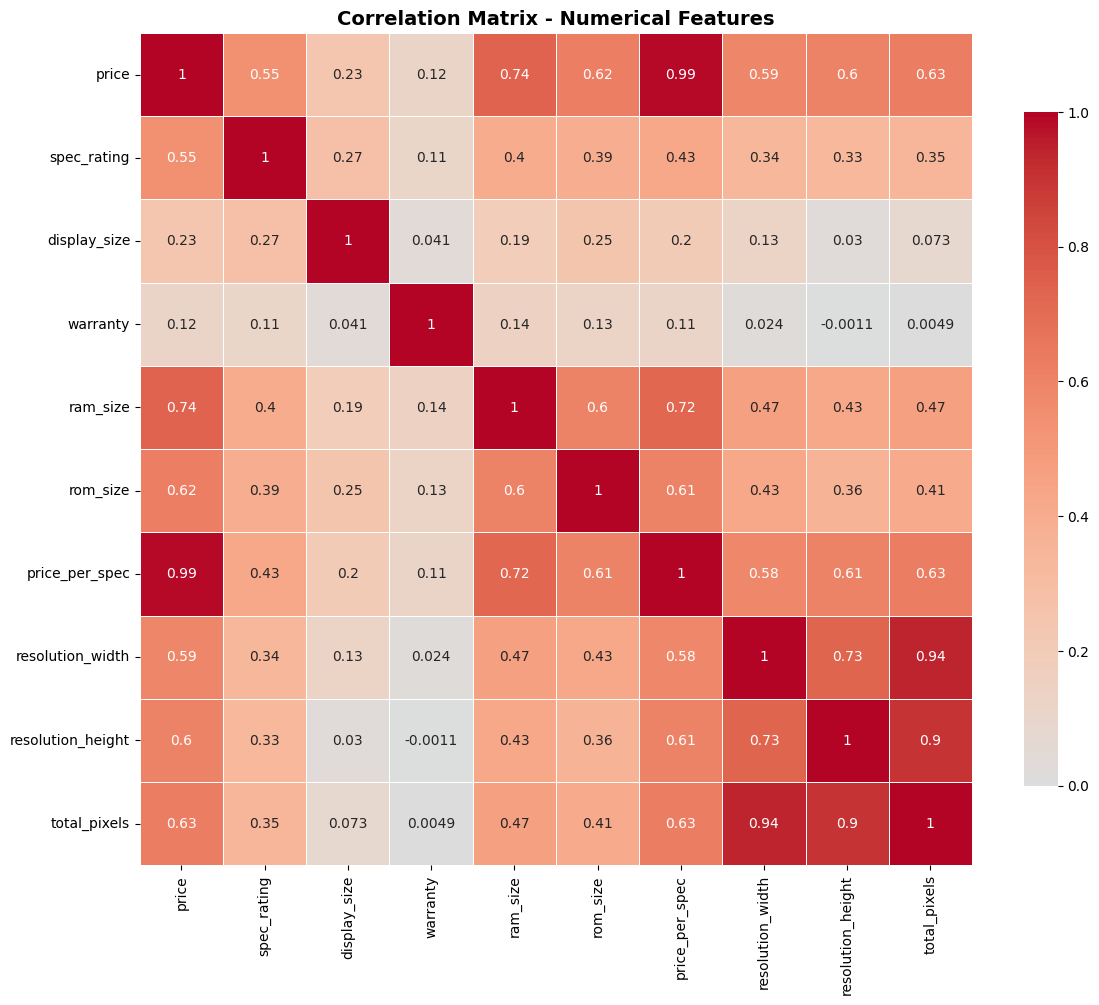


Korelasi dengan Price (diurutkan):
price_per_spec      : 0.987
ram_size            : 0.737
total_pixels        : 0.628
rom_size            : 0.624
resolution_height   : 0.605
resolution_width    : 0.586
spec_rating         : 0.546
display_size        : 0.234
warranty            : 0.117


In [8]:
# ============================================================================
# CELL 8: CORRELATION ANALYSIS
# ============================================================================

print("🔗 CORRELATION ANALYSIS")
print("="*50)

# Pilih kolom numerik untuk analisis korelasi
numeric_cols = ['price', 'spec_rating', 'display_size', 'warranty',
                'ram_size', 'rom_size', 'price_per_spec']

# Tambahkan kolom resolution jika ada
if 'resolution_width' in df_features.columns:
    numeric_cols.extend(['resolution_width', 'resolution_height', 'total_pixels'])

# Pastikan semua kolom ada
available_numeric_cols = [col for col in numeric_cols if col in df_features.columns]
correlation_matrix = df_features[available_numeric_cols].corr()

# Visualisasi correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Tampilkan korelasi dengan price
price_corr = correlation_matrix['price'].sort_values(ascending=False)
print("\nKorelasi dengan Price (diurutkan):")
for feature, corr in price_corr.items():
    if feature != 'price':
        print(f"{feature:20}: {corr:.3f}")

In [9]:
# ============================================================================
# CELL 9: PREPARE DATA UNTUK MODELING
# ============================================================================

print("🎯 PREPARE DATA UNTUK MODELING")
print("="*50)

# Definisikan features berdasarkan kolom yang tersedia
target = 'price'

# Numerical features - hanya gunakan yang tersedia
base_numerical = ['spec_rating', 'display_size', 'warranty', 'ram_size', 'rom_size']
numerical_features = [col for col in base_numerical if col in df_features.columns]

# Tambahkan resolution features jika ada
if 'resolution_width' in df_features.columns:
    numerical_features.extend(['resolution_width', 'resolution_height'])

# Categorical features - hanya gunakan yang tersedia
base_categorical = ['brand', 'processor', 'Ram_type', 'ROM_type', 'GPU', 'OS']
categorical_features = [col for col in base_categorical if col in df_features.columns]

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

# Prepare X dan y
X = df_features[numerical_features + categorical_features]
y = df_features[target]

print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df_features['price_category']
)

print(f"\nData split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

🎯 PREPARE DATA UNTUK MODELING
Numerical features: ['spec_rating', 'display_size', 'warranty', 'ram_size', 'rom_size', 'resolution_width', 'resolution_height']
Categorical features: ['brand', 'processor', 'Ram_type', 'ROM_type', 'GPU', 'OS']

Shape of X: (893, 13)
Shape of y: (893,)

Data split:
Training set: 714 samples
Test set: 179 samples


In [10]:
# ============================================================================
# CELL 10: PREPROCESSING PIPELINE
# ============================================================================

print("⚙️ SETUP PREPROCESSING PIPELINE")
print("="*50)

# Buat preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

print("✅ Preprocessing pipeline telah dibuat")

⚙️ SETUP PREPROCESSING PIPELINE
✅ Preprocessing pipeline telah dibuat


In [11]:
# ============================================================================
# CELL 11: MODEL BUILDING DAN TRAINING
# ============================================================================

print("🤖 MODEL BUILDING DAN TRAINING")
print("="*50)

# Definisikan models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100)
}

# Training dan evaluasi
results = {}
trained_models = {}

print("Training models...")
print("-" * 30)

for name, model in models.items():
    print(f"Training {name}...")

    # Buat pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train model
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)

    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

    # Store results
    results[name] = {
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'CV R² Mean': cv_scores.mean(),
        'CV R² Std': cv_scores.std()
    }

    trained_models[name] = pipeline

    print(f"  ✅ {name} - Test R²: {test_r2:.3f}, Test RMSE: {test_rmse:.0f}")

🤖 MODEL BUILDING DAN TRAINING
Training models...
------------------------------
Training Linear Regression...
  ✅ Linear Regression - Test R²: 0.707, Test RMSE: 32965
Training Ridge Regression...
  ✅ Ridge Regression - Test R²: 0.815, Test RMSE: 26161
Training Lasso Regression...
  ✅ Lasso Regression - Test R²: 0.699, Test RMSE: 33426
Training Decision Tree...
  ✅ Decision Tree - Test R²: 0.651, Test RMSE: 35941
Training Random Forest...
  ✅ Random Forest - Test R²: 0.737, Test RMSE: 31237
Training Gradient Boosting...
  ✅ Gradient Boosting - Test R²: 0.720, Test RMSE: 32199


📊 MODEL EVALUATION DAN COMPARISON
PERFORMA SEMUA MODEL:
                   Train R²  Test R²  Train RMSE  Test RMSE   Test MAE  \
Linear Regression     0.954    0.707   13047.840  32964.765  17187.414   
Ridge Regression      0.927    0.815   16464.765  26161.242  15269.272   
Lasso Regression      0.954    0.699   13063.272  33426.164  16388.736   
Decision Tree         1.000    0.651    1187.864  35941.213  16585.833   
Random Forest         0.969    0.737   10625.799  31237.045  15703.211   
Gradient Boosting     0.935    0.720   15476.065  32199.074  17105.950   

                   CV R² Mean  CV R² Std  
Linear Regression       0.638      0.128  
Ridge Regression        0.786      0.039  
Lasso Regression        0.670      0.120  
Decision Tree           0.594      0.121  
Random Forest           0.771      0.045  
Gradient Boosting       0.757      0.048  


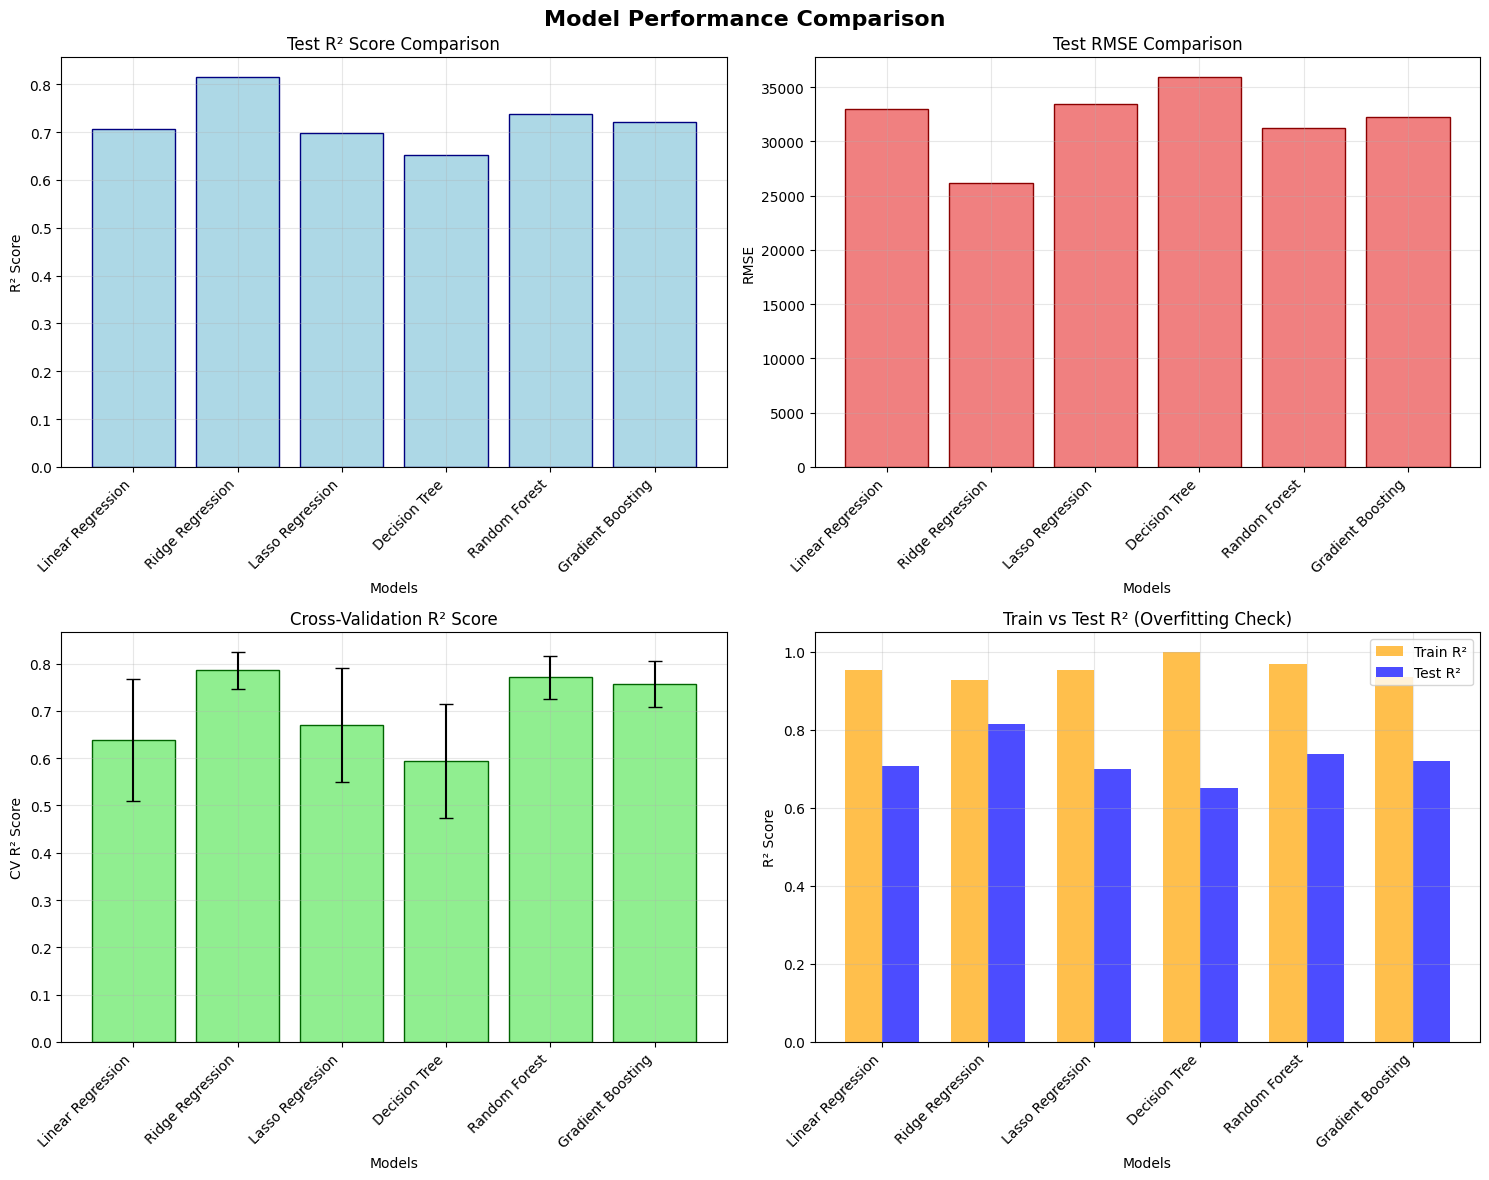


🏆 BEST MODEL: Ridge Regression
Test R² Score: 0.815
Test RMSE: 26161
Test MAE: 15269


In [12]:
# ============================================================================
# CELL 12: MODEL EVALUATION DAN COMPARISON
# ============================================================================

print("📊 MODEL EVALUATION DAN COMPARISON")
print("="*50)

# Buat DataFrame hasil
results_df = pd.DataFrame(results).T
print("PERFORMA SEMUA MODEL:")
print("="*80)
print(results_df.round(3))

# Visualisasi perbandingan model
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# 1. R² Score comparison
test_r2_scores = [results[model]['Test R²'] for model in models.keys()]
axes[0,0].bar(range(len(models)), test_r2_scores, color='lightblue', edgecolor='navy')
axes[0,0].set_title('Test R² Score Comparison')
axes[0,0].set_xlabel('Models')
axes[0,0].set_ylabel('R² Score')
axes[0,0].set_xticks(range(len(models)))
axes[0,0].set_xticklabels(models.keys(), rotation=45, ha='right')
axes[0,0].grid(True, alpha=0.3)

# 2. RMSE comparison
test_rmse_scores = [results[model]['Test RMSE'] for model in models.keys()]
axes[0,1].bar(range(len(models)), test_rmse_scores, color='lightcoral', edgecolor='darkred')
axes[0,1].set_title('Test RMSE Comparison')
axes[0,1].set_xlabel('Models')
axes[0,1].set_ylabel('RMSE')
axes[0,1].set_xticks(range(len(models)))
axes[0,1].set_xticklabels(models.keys(), rotation=45, ha='right')
axes[0,1].grid(True, alpha=0.3)

# 3. Cross-validation comparison
cv_r2_means = [results[model]['CV R² Mean'] for model in models.keys()]
cv_r2_stds = [results[model]['CV R² Std'] for model in models.keys()]
axes[1,0].bar(range(len(models)), cv_r2_means, yerr=cv_r2_stds,
              color='lightgreen', edgecolor='darkgreen', capsize=5)
axes[1,0].set_title('Cross-Validation R² Score')
axes[1,0].set_xlabel('Models')
axes[1,0].set_ylabel('CV R² Score')
axes[1,0].set_xticks(range(len(models)))
axes[1,0].set_xticklabels(models.keys(), rotation=45, ha='right')
axes[1,0].grid(True, alpha=0.3)

# 4. Train vs Test R²
train_r2_scores = [results[model]['Train R²'] for model in models.keys()]
x_pos = np.arange(len(models))
width = 0.35
axes[1,1].bar(x_pos - width/2, train_r2_scores, width, label='Train R²', color='orange', alpha=0.7)
axes[1,1].bar(x_pos + width/2, test_r2_scores, width, label='Test R²', color='blue', alpha=0.7)
axes[1,1].set_title('Train vs Test R² (Overfitting Check)')
axes[1,1].set_xlabel('Models')
axes[1,1].set_ylabel('R² Score')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(models.keys(), rotation=45, ha='right')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identifikasi best model
best_model_name = results_df['Test R²'].idxmax()
best_model = trained_models[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"Test R² Score: {results[best_model_name]['Test R²']:.3f}")
print(f"Test RMSE: {results[best_model_name]['Test RMSE']:.0f}")
print(f"Test MAE: {results[best_model_name]['Test MAE']:.0f}")

In [13]:
# ============================================================================
# CELL 13: FEATURE IMPORTANCE (untuk tree-based models)
# ============================================================================

print("🎯 FEATURE IMPORTANCE ANALYSIS")
print("="*50)

if 'Random Forest' in best_model_name or 'Decision Tree' in best_model_name or 'Gradient Boosting' in best_model_name:

    # Get feature names setelah preprocessing
    preprocessor_fitted = best_model.named_steps['preprocessor']

    # Get feature names
    feature_names = (numerical_features +
                    list(preprocessor_fitted.named_transformers_['cat']
                         .get_feature_names_out(categorical_features)))

    # Get feature importance
    importance_scores = best_model.named_steps['regressor'].feature_importances_

    # Buat DataFrame feature importance
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance_scores
    }).sort_values('importance', ascending=False)

    print("TOP 15 MOST IMPORTANT FEATURES:")
    print("-" * 40)
    for i, (_, row) in enumerate(feature_importance_df.head(15).iterrows(), 1):
        print(f"{i:2d}. {row['feature']:25} : {row['importance']:.3f}")

    # Visualisasi feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['importance'], color='skyblue', edgecolor='navy')
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Importance Score')
    plt.title(f'Top 15 Feature Importance - {best_model_name}', fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

🎯 FEATURE IMPORTANCE ANALYSIS


🎉 FINAL MODEL EVALUATION
FINAL MODEL: Ridge Regression
Final Test R²: 0.815
Final Test RMSE: $26161
Final Test MAE: $15269


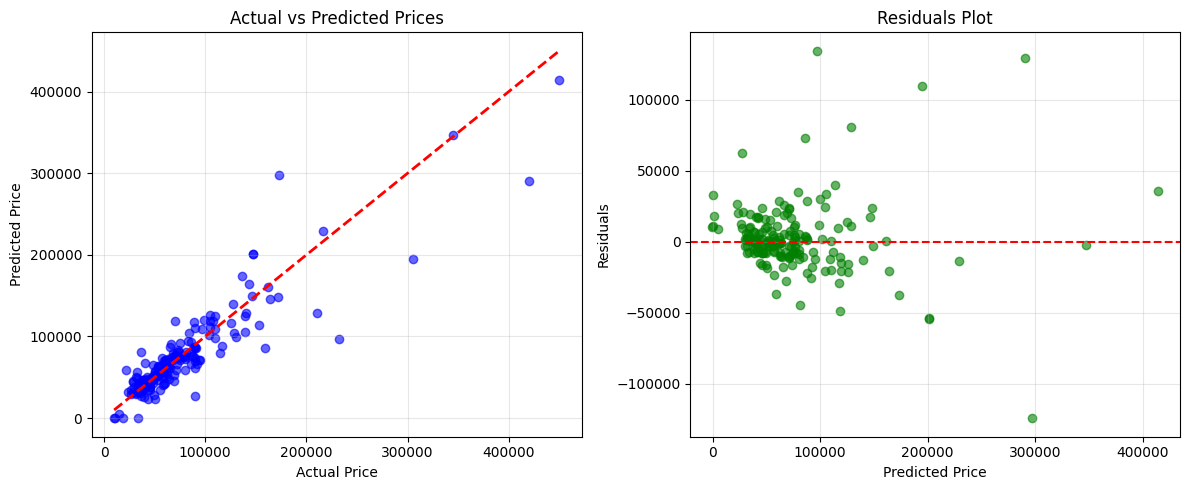

In [14]:
# ============================================================================
# CELL 14: FINAL MODEL EVALUATION
# ============================================================================

print("🎉 FINAL MODEL EVALUATION")
print("="*50)

# Final predictions
y_pred_final = best_model.predict(X_test)
final_r2 = results[best_model_name]['Test R²']
final_rmse = results[best_model_name]['Test RMSE']
final_mae = results[best_model_name]['Test MAE']

print(f"FINAL MODEL: {best_model_name}")
print(f"Final Test R²: {final_r2:.3f}")
print(f"Final Test RMSE: ${final_rmse:.0f}")
print(f"Final Test MAE: ${final_mae:.0f}")

# Prediction vs Actual plot
plt.figure(figsize=(12, 5))

# 1. Prediction vs Actual scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_final, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True, alpha=0.3)

# 2. Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_final
plt.scatter(y_pred_final, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
# ============================================================================
# CELL 15: PREDICTION EXAMPLES
# ============================================================================

print("🔮 CONTOH PREDIKSI")
print("="*50)

# Contoh prediksi
sample_indices = [0, 10, 20, 30, 40]
print("CONTOH PREDIKSI HARGA LAPTOP:")
print("-" * 70)
print(f"{'No':<3} {'Actual':<10} {'Predicted':<10} {'Error':<10} {'Error %':<10}")
print("-" * 70)

for i, idx in enumerate(sample_indices[:min(5, len(y_test))], 1):
    actual = y_test.iloc[idx]
    predicted = y_pred_final[idx]
    error = abs(actual - predicted)
    error_pct = (error / actual) * 100

    print(f"{i:<3} ${actual:<9.0f} ${predicted:<9.0f} ${error:<9.0f} {error_pct:<9.1f}%")

🔮 CONTOH PREDIKSI
CONTOH PREDIKSI HARGA LAPTOP:
----------------------------------------------------------------------
No  Actual     Predicted  Error      Error %   
----------------------------------------------------------------------
1   $47990     $42608     $5382      11.2     %
2   $40250     $67747     $27497     68.3     %
3   $33990     $41037     $7047      20.7     %
4   $83149     $94960     $11811     14.2     %
5   $60539     $67593     $7054      11.7     %


In [16]:
# ============================================================================
# CELL 16: PREDICTION FUNCTION
# ============================================================================

def predict_laptop_price(model, feature_dict):
    """
    Function untuk memprediksi harga laptop

    Parameters:
    - model: trained model
    - feature_dict: dictionary berisi feature values

    Returns:
    - predicted_price: prediksi harga
    """

    # Buat DataFrame dari input
    input_df = pd.DataFrame([feature_dict])

    # Pastikan semua required columns ada
    for col in numerical_features + categorical_features:
        if col not in input_df.columns:
            # Set default values
            if col in numerical_features:
                if col == 'spec_rating':
                    input_df[col] = 3.0
                elif col == 'display_size':
                    input_df[col] = 15.6
                elif col == 'warranty':
                    input_df[col] = 1
                elif col == 'ram_size':
                    input_df[col] = 8
                elif col == 'rom_size':
                    input_df[col] = 256
                else:
                    input_df[col] = 0
            else:
                input_df[col] = 'Unknown'

    # Reorder columns
    input_df = input_df[numerical_features + categorical_features]

    # Predict
    prediction = model.predict(input_df)[0]

    return prediction

# Contoh penggunaan
print("🔧 FUNCTION UNTUK PREDIKSI BARU TELAH DIBUAT!")
print("="*50)

# Example prediction
example_laptop = {
    'spec_rating': 4.5,
    'display_size': 15.6,
    'warranty': 2,
    'ram_size': 16,
    'rom_size': 512
}

# Tambahkan categorical features jika ada
for cat_col in categorical_features:
    if cat_col == 'brand':
        example_laptop[cat_col] = 'ASUS'
    elif cat_col == 'processor':
        example_laptop[cat_col] = 'Intel Core i7'
    elif cat_col == 'OS':
        example_laptop[cat_col] = 'Windows'
    else:
        example_laptop[cat_col] = 'Standard'

try:
    predicted_price = predict_laptop_price(best_model, example_laptop)
    print(f"Contoh prediksi harga: ${predicted_price:.0f}")
except Exception as e:
    print(f"Error dalam prediksi: {e}")


🔧 FUNCTION UNTUK PREDIKSI BARU TELAH DIBUAT!
Contoh prediksi harga: $-36777


In [17]:
# ============================================================================
# CELL 17: MODEL SUMMARY DAN INSIGHTS
# ============================================================================

print("📋 MODEL SUMMARY DAN BUSINESS INSIGHTS")
print("="*50)

print(f"Dataset: {df.shape[0]} laptop records")
print(f"Features used: {len(numerical_features + categorical_features)}")
print(f"Best model: {best_model_name}")
print(f"Model performance:")
print(f"  - R² Score: {final_r2:.3f} (menjelaskan {final_r2*100:.1f}% variasi harga)")
print(f"  - RMSE: ${final_rmse:.0f} (rata-rata error prediksi)")
print(f"  - MAE: ${final_mae:.0f} (rata-rata absolute error)")

# Price category distribution
print(f"\nDISTRIBUSI KATEGORI HARGA:")
price_dist = df_features['price_category'].value_counts()
for category, count in price_dist.items():
    pct = (count/len(df_features))*100
    print(f"  {category}: {count} laptop ({pct:.1f}%)")

# Brand analysis
print(f"\nTOP 5 BRAND BERDASARKAN RATA-RATA HARGA:")
brand_avg = df_features.groupby('brand')['price'].mean().sort_values(ascending=False).head()
for brand, price in brand_avg.items():
    print(f"  {brand}: ${price:.0f}")

print(f"\n💡 INTERPRETASI HASIL:")
print("="*50)
if final_r2 >= 0.8:
    print("✅ Model SANGAT BAIK - Prediksi sangat akurat")
elif final_r2 >= 0.6:
    print("✅ Model BAIK - Prediksi cukup akurat")
elif final_r2 >= 0.4:
    print("⚠️ Model CUKUP - Perlu improvement")
else:
    print("❌ Model KURANG BAIK - Perlu perbaikan")

print(f"\n🎯 Model ini dapat digunakan untuk:")
print("1. Estimasi harga laptop berdasarkan spesifikasi")
print("2. Pricing strategy dan market analysis")
print("3. Value-for-money evaluation")
print("4. Competitive pricing benchmarking")

print("\n✅ ANALISIS SELESAI!")
print("="*50)
print("Semua tahap analisis telah completed:")
print("✅ Data exploration & cleaning")
print("✅ Feature engineering")
print("✅ Model training & evaluation")
print("✅ Best model selection")
print("✅ Prediction function ready")
print("🎉 Model siap untuk deployment!")

📋 MODEL SUMMARY DAN BUSINESS INSIGHTS
Dataset: 893 laptop records
Features used: 13
Best model: Ridge Regression
Model performance:
  - R² Score: 0.815 (menjelaskan 81.5% variasi harga)
  - RMSE: $26161 (rata-rata error prediksi)
  - MAE: $15269 (rata-rata absolute error)

DISTRIBUSI KATEGORI HARGA:
  Premium: 893 laptop (100.0%)

TOP 5 BRAND BERDASARKAN RATA-RATA HARGA:
  Razer: $199990
  Apple: $174231
  Gigabyte: $133279
  LG: $128618
  Samsung: $117512

💡 INTERPRETASI HASIL:
✅ Model SANGAT BAIK - Prediksi sangat akurat

🎯 Model ini dapat digunakan untuk:
1. Estimasi harga laptop berdasarkan spesifikasi
2. Pricing strategy dan market analysis
3. Value-for-money evaluation
4. Competitive pricing benchmarking

✅ ANALISIS SELESAI!
Semua tahap analisis telah completed:
✅ Data exploration & cleaning
✅ Feature engineering
✅ Model training & evaluation
✅ Best model selection
✅ Prediction function ready
🎉 Model siap untuk deployment!
